## Q-Agent (FrozenLake-v1)

In [12]:
#Imports

import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#environment
env = gym.make("FrozenLake-v1", is_slippery=True)

In [13]:
# Q-Agent Class
class QAgent:
  def __init__(self, env, alpha, gamma):
    self.env = env

    # q-table: n_statess x n_actions
    self.q_table = np.zeros([env.observation_space.n, env.action_space.n])

    #hyperparameters
    self.alpha = alpha #learning rate
    self.gamma = gamma #discount factor

  def get_action(self, state, epsilon):
    # epsilon-greedy policy
    if random.random() < epsilon:
        return self.env.action_space.sample()
    # Break ties randomly instead of always choosing index 0
    values = self.q_table[state]
    max_value = np.max(values)
    best_actions = np.where(values == max_value)[0]
    return np.random.choice(best_actions)

  def update(self, state, action, reward, next_state):
    old = self.q_table[state, action]
    next_max = np.max(self.q_table[next_state])
    #Bellman equation
    new = old + self.alpha * (reward + self.gamma * next_max - old)
    self.q_table[state, action] = new

In [14]:
# initializing hyperparameters
alpha = 0.5
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.9995

In [15]:
agent = QAgent(env, alpha, gamma)

n_episodes = 20000

timesteps_per_episode = []
success_per_episode = []

for ep in range(n_episodes):
  state, info = env.reset()
  epochs = 0
  done = False
  reward = 0

  while not done:
    action = agent.get_action(state, epsilon)
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    agent.update(state, action, reward, next_state)
    state = next_state
    epochs += 1

  # Decay epsilon
  epsilon = max(epsilon_min, epsilon * epsilon_decay)

  timesteps_per_episode.append(epochs)
  success_per_episode.append(1 if reward == 1 else 0)

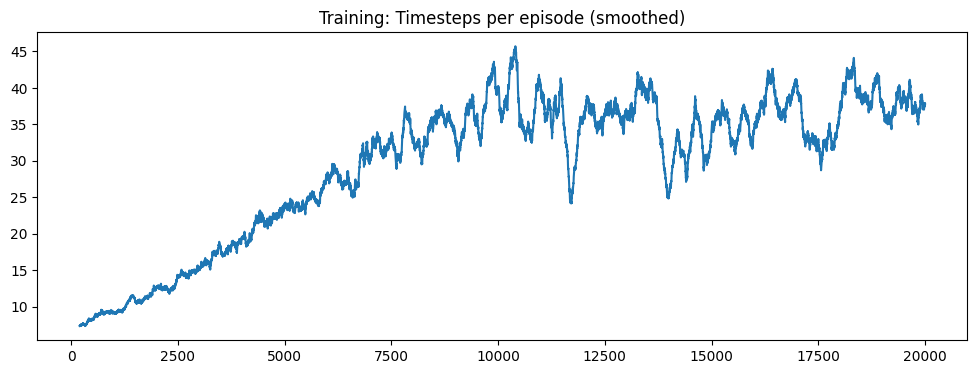

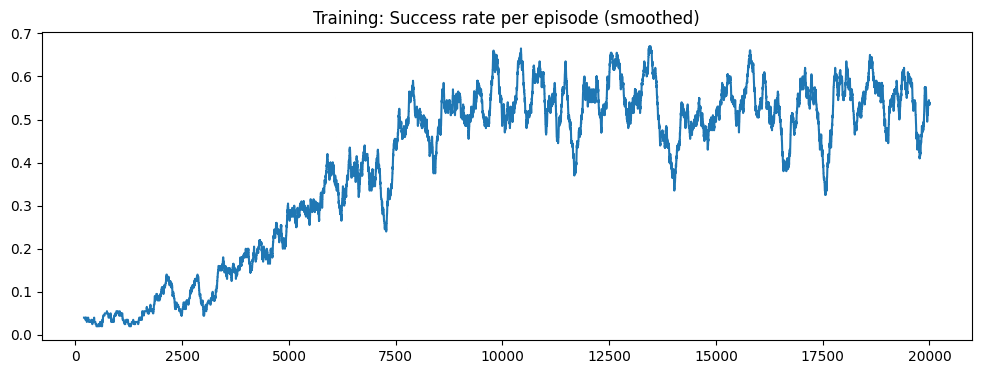

Training:
Average Steps: 29.59815
Success rate: 40.11 %


In [16]:
# Training Plots
plt.figure(figsize=(12, 4))
pd.Series(timesteps_per_episode).rolling(200).mean().plot()
plt.title("Training: Timesteps per episode (smoothed)")
plt.show()

plt.figure(figsize=(12,4))
pd.Series(success_per_episode).rolling(200).mean().plot()
plt.title("Training: Success rate per episode (smoothed)")
plt.show()

print("Training:")
print("Average Steps:", np.mean(timesteps_per_episode))
print("Success rate:", np.mean(success_per_episode) * 100, "%")

In [17]:
# Evaluation (pure exploitation)
epsilon_eval = 0.0
n_eval_episodes = 200

timesteps_eval = []
success_eval = []

for ep in range(n_eval_episodes):
    state, info = env.reset()
    done = False
    epochs = 0
    reward = 0

    while not done:
        action = agent.get_action(state, epsilon_eval)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        epochs += 1

    timesteps_eval.append(epochs)
    success_eval.append(1 if reward == 1 else 0)


print("\nEvaluation:")
print("Avg Steps:", np.mean(timesteps_eval))
print("Success rate:", np.mean(success_eval) * 100, "%")


Evaluation:
Avg Steps: 45.14
Success rate: 71.0 %
